In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
# Sample data table (you should replace this with your own data)
data = pd.DataFrame({
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})
# Convert categorical data to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)
# Split data into features and target variable
X = data.drop('buys_computer_yes', axis=1)
y = data['buys_computer_yes']
# Calculate Information Gain for each feature
information_gain = mutual_info_classif(X, y)
# Find the feature with the highest Information Gain
root_node_feature_index = np.argmax(information_gain)
root_node_feature_name = X.columns[root_node_feature_index]
print(f"The root node feature selected is: {root_node_feature_name}")

The root node feature selected is: age_<=30


In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Create the dataset
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)


df


,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [8]:
import numpy as np

attribute_names = ["Age", "Income", "Student", "Credit_Rating", "Buys_Computer"]

data = np.array([
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31-40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31-40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31-40", "medium", "no", "excellent", "yes"],
    ["31-40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
])

def entropy(data, column):
    unique_values, counts = np.unique(data[:, column], return_counts=True)
    probabilities = counts / len(data)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

entropies = {}
for column in range(data.shape[1] - 1):
    entropies[attribute_names[column]] = entropy(data, column)

first_feature = max(entropies.items(), key=lambda item: item[1])[0]

print("Entropy of each attribute / feature:")
for attribute, entropy_val in entropies.items():
    print(f"{attribute}: {entropy_val:.3f}")

print("First feature to be selected for constructing the decision tree:")
print(f"{first_feature}: {entropies[first_feature]:.2f}")

Entropy of each attribute / feature:
Age: 1.577
Income: 1.557
Student: 1.000
Credit_Rating: 0.985
First feature to be selected for constructing the decision tree:
Age: 1.58


In [15]:

Tr_X = df[['age', 'income', 'student', 'credit_rating']]
Tr_y = df['buys_computer']

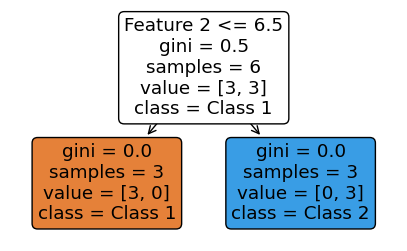

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
data_class_1 = np.array([[1, 2], [3, 4], [5, 6]])
data_class_2 = np.array([[6, 7], [8, 9], [10, 11]])
Tr_X = np.vstack([data_class_1, data_class_2])
Tr_y = np.array([0, 0, 0, 1, 1, 1])
ml_model = DecisionTreeClassifier()
model = ml_model.fit(Tr_X, Tr_y)
plt.figure(figsize=(5,3))
plot_tree(model, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 1", "Class 2"], rounded=True)
plt.show()

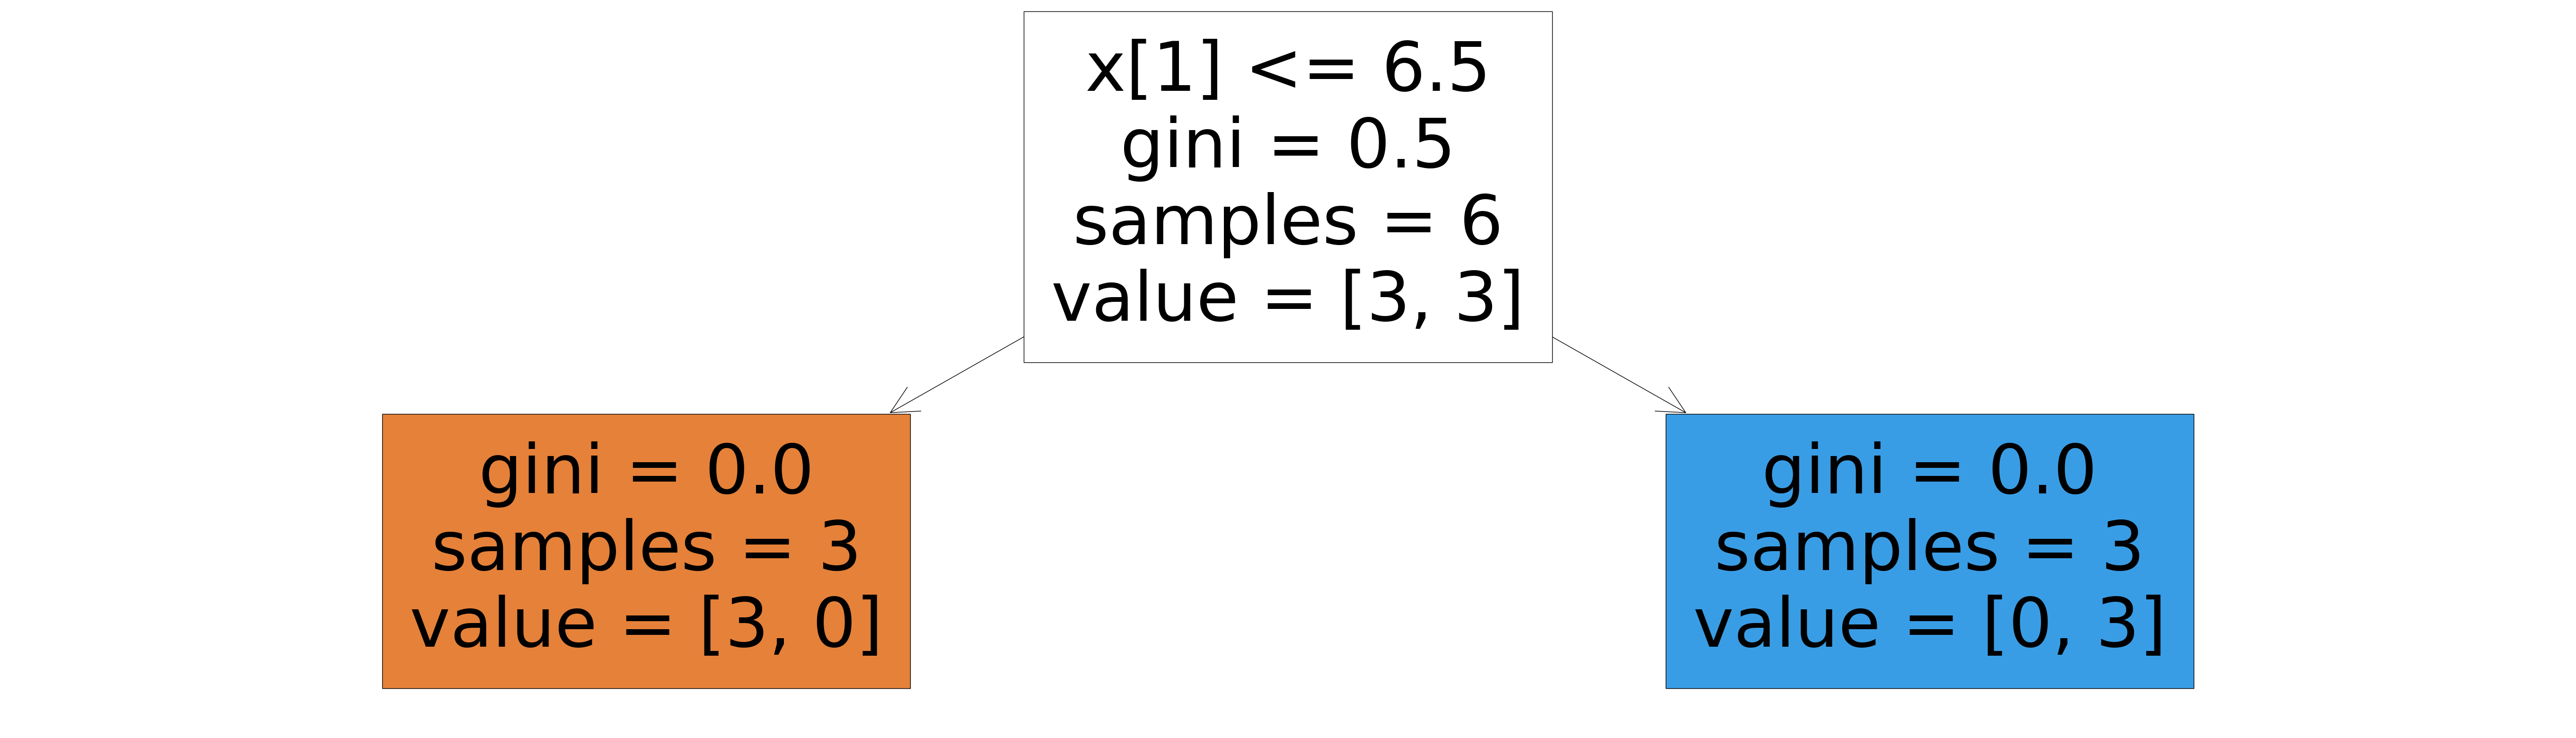

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70, 20))
tree.plot_tree(model, filled=True)
plt.show()


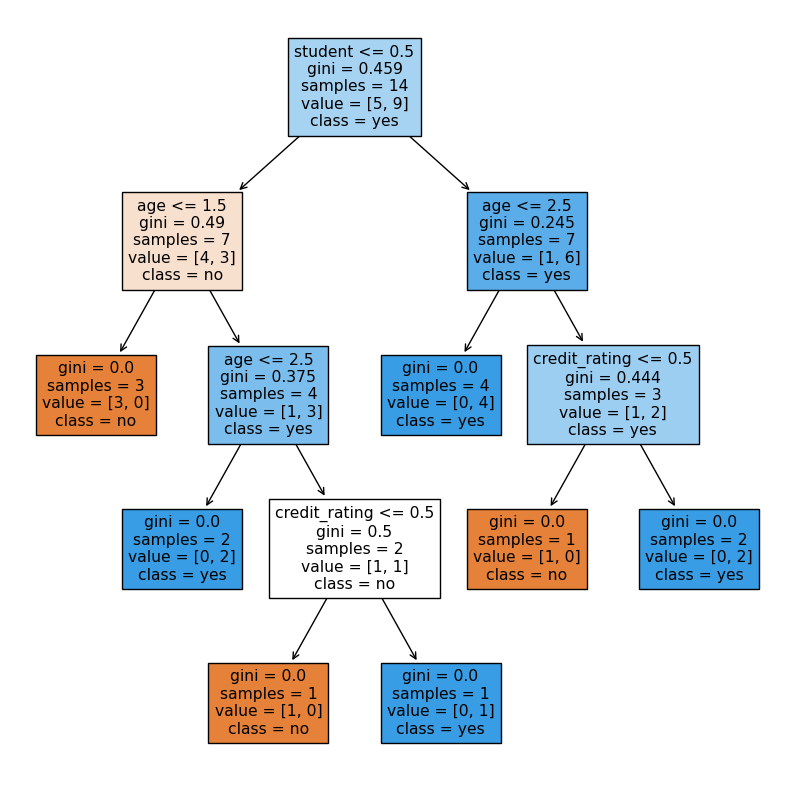

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree
# Convert categorical variables to numerical
age_num = [1, 1, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2, 3]
income_num = [2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1]
student_num = [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
credit_rating_num = [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0]
buys_computer_num = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

 

# Combine the numerical features into a single feature matrix
X = list(zip(age_num, income_num, student_num, credit_rating_num))

 

# Combine the target variable into a single target vector
y = buys_computer_num

 

# Construct the decision tree model
model = tree.DecisionTreeClassifier()
model.fit(X, y)

 

# Visualize the decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model, filled=True, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['no', 'yes'])
plt.show()

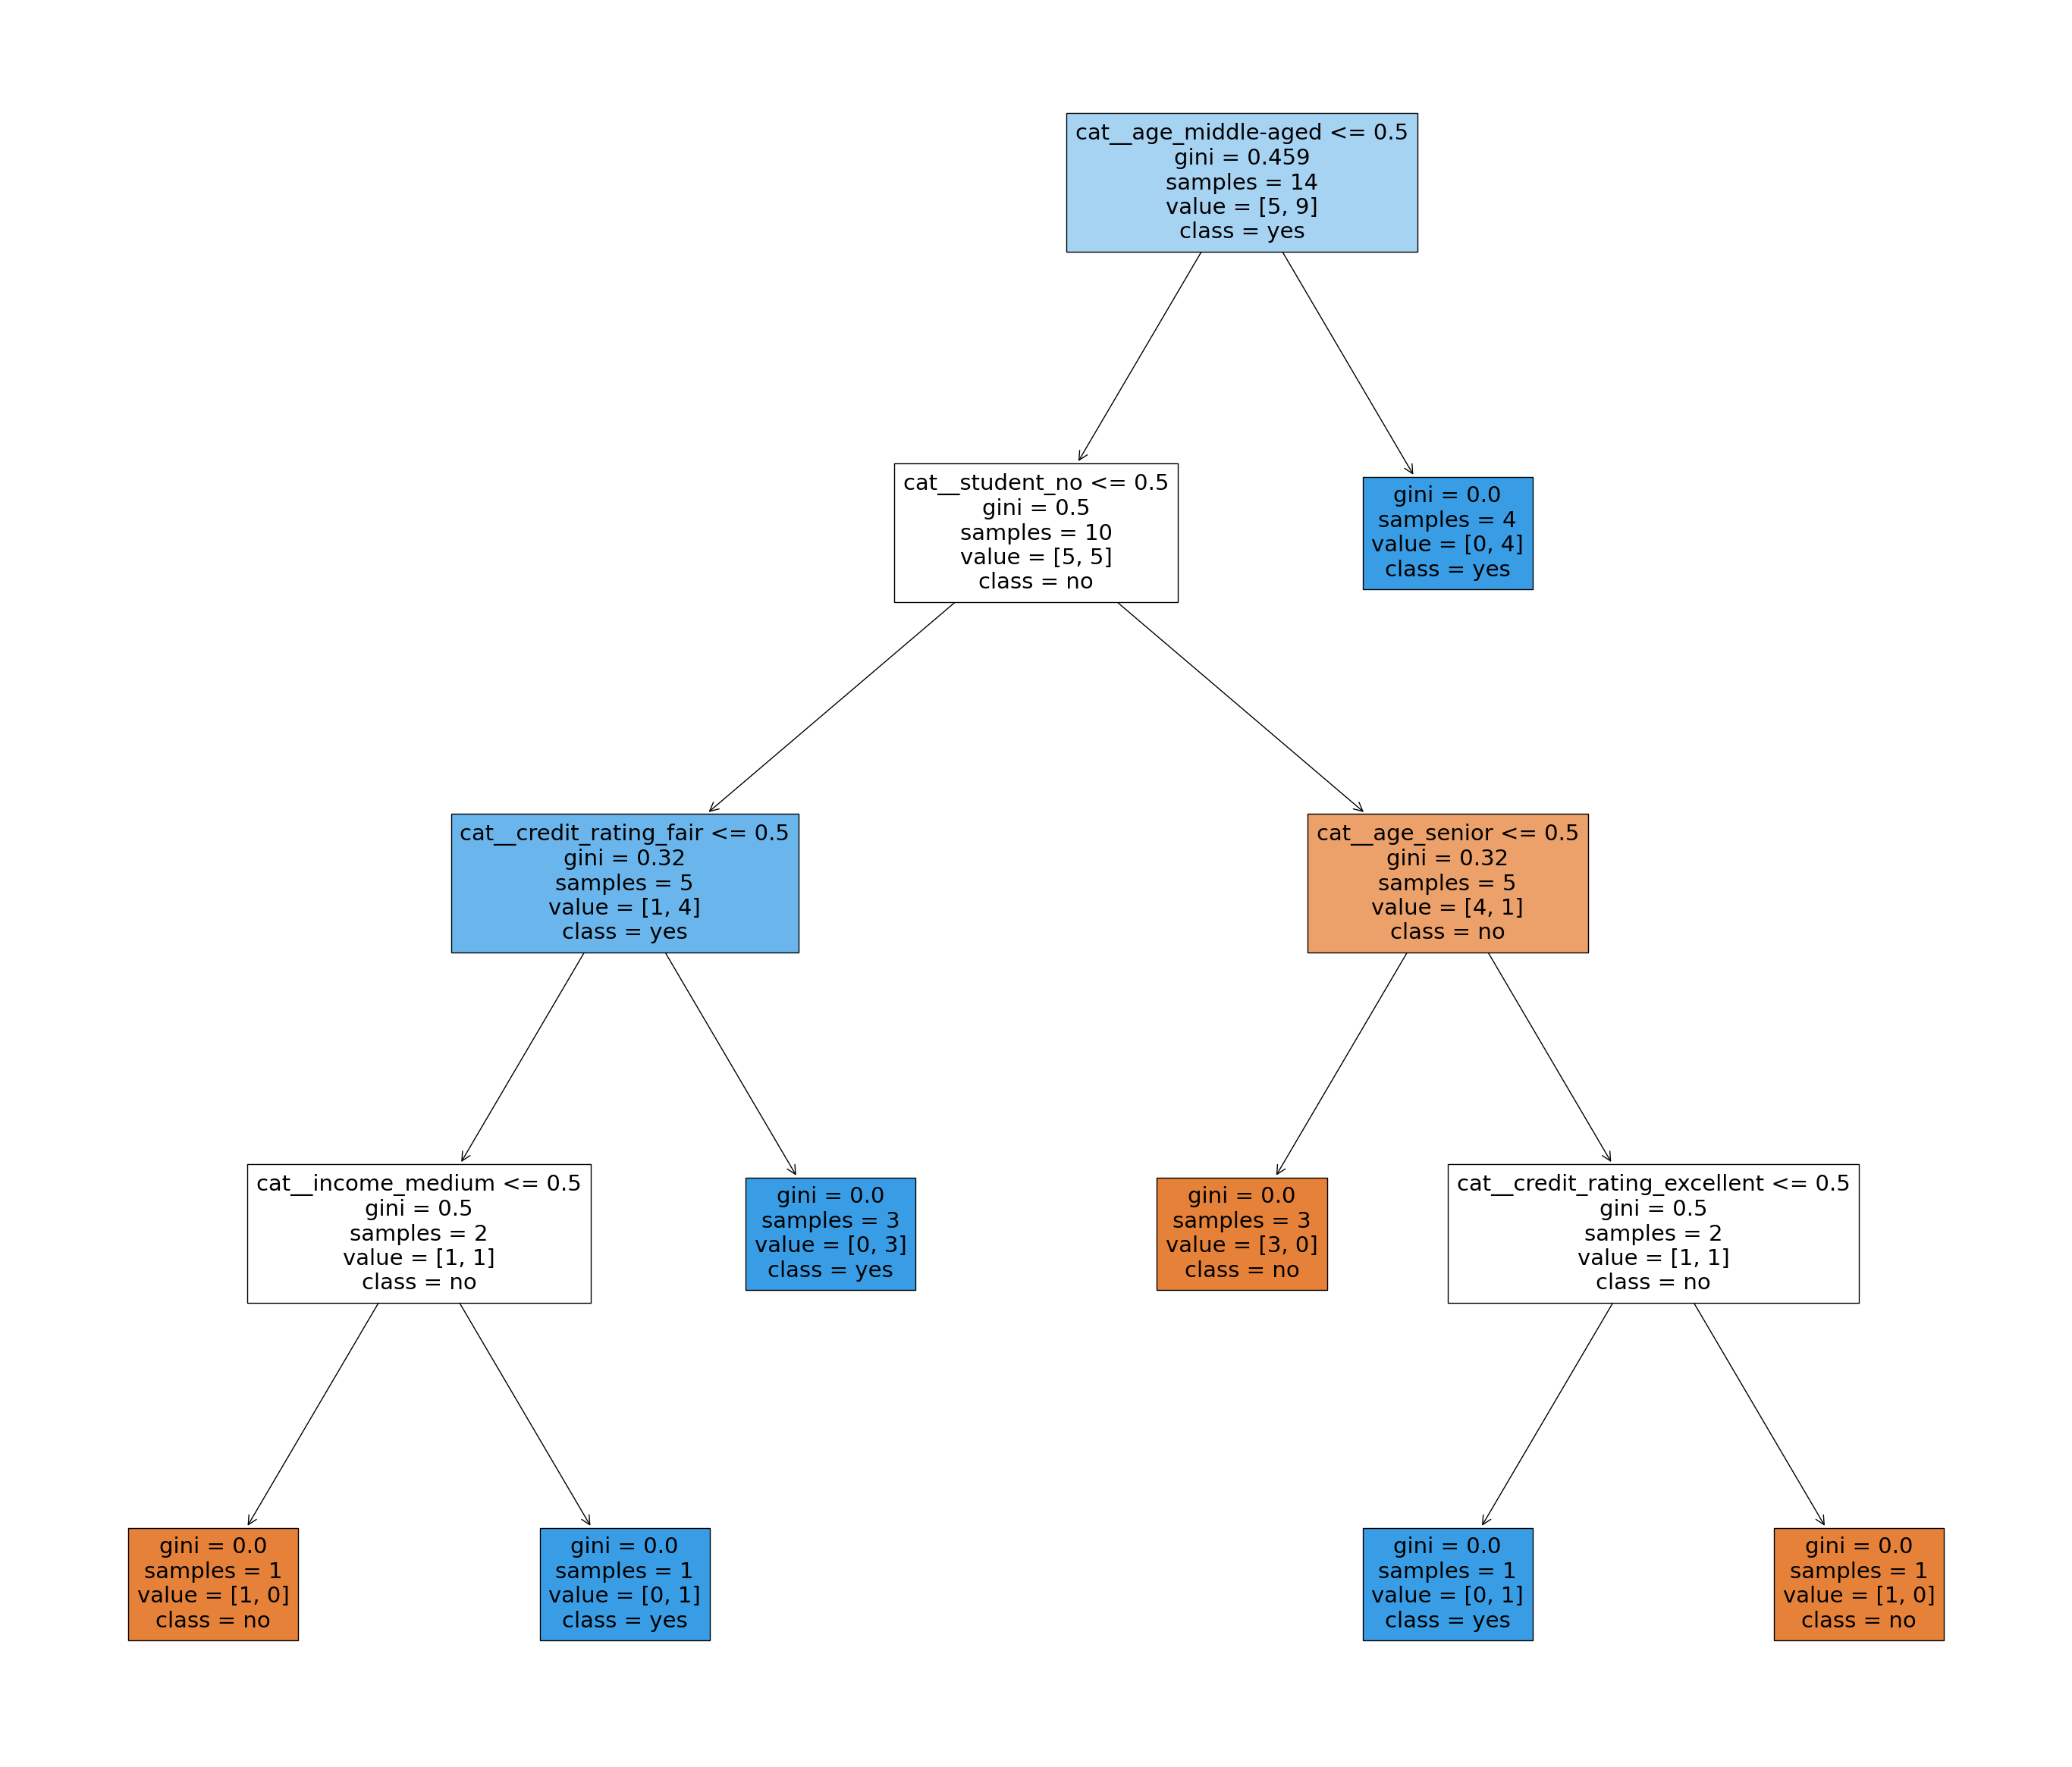

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

feature_names = list(pipeline.named_steps["preprocessor"].get_feature_names_out(input_features=categorical_features)) + list(X.columns.drop(categorical_features))

plt.figure(figsize=(35, 30))
plot_tree(pipeline.named_steps["classifier"], filled=True, feature_names=feature_names, class_names=['no', 'yes'])
plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

X = df.drop(columns=['buys_computer'])
y = df['buys_computer']

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Calculate the depth of the constructed tree
depth = clf.get_depth()
print("Depth of the Decision Tree:", depth)

Depth of the Decision Tree: 4


In [29]:
# Calculate the entropy at the root node
class_counts = df['buys_computer'].value_counts()
class_probabilities = class_counts / len(df)
root_entropy = -np.sum(class_probabilities * np.log2(class_probabilities))

# Calculate the entropy and information gain for each attribute
attributes = ['age', 'income', 'student', 'credit_rating']
entropies = []
information_gains = []

for attribute in attributes:
    attribute_entropy = 0
    attribute_information_gain = 0

    # Split the dataset based on the unique values of the attribute
    attribute_values = df[attribute].unique()
    for value in attribute_values:
        subset = df[df[attribute] == value]
        subset_class_counts = subset['buys_computer'].value_counts()
        subset_class_probabilities = subset_class_counts / len(subset)
        subset_entropy = -np.sum(subset_class_probabilities * np.log2(subset_class_probabilities))
        attribute_entropy += (len(subset) / len(df)) * subset_entropy

    # Calculate the information gain for the attribute
    attribute_information_gain = root_entropy - attribute_entropy

    entropies.append(attribute_entropy)
    information_gains.append(attribute_information_gain)
# Find the attribute with the highest Information Gain (the root node)
root_node_index = np.argmax(information_gains)
root_node_attribute = attributes[root_node_index]
root_node_information_gain = information_gains[root_node_index]

print(f"The root node is '{root_node_attribute}' with Information Gain {root_node_information_gain:.2f}")

# Print the entropies and information gains
for i in range(len(attributes)):
    print(f"Entropy for {attributes[i]}: {entropies[i]}")
    print(f"Information Gain for {attributes[i]}: {information_gains[i]}")

The root node is 'age' with Information Gain 0.25
Entropy for age: 0.6935361388961918
Information Gain for age: 0.24674981977443933
Entropy for income: 0.9110633930116763
Information Gain for income: 0.02922256565895487
Entropy for student: 0.7884504573082896
Information Gain for student: 0.15183550136234159
Entropy for credit_rating: 0.8921589282623617
Information Gain for credit_rating: 0.04812703040826949


In [32]:
import numpy as np 
import pandas as pd 
training_data=pd.read_excel(r"C:\Users\DELL\Downloads\new training.xlsx")
testing_data=pd.read_excel(r"C:\Users\DELL\Downloads\new testing.xlsx")

Training Set Accuracy: 0.9778172138420586
Test Set Accuracy: 0.9571428571428572


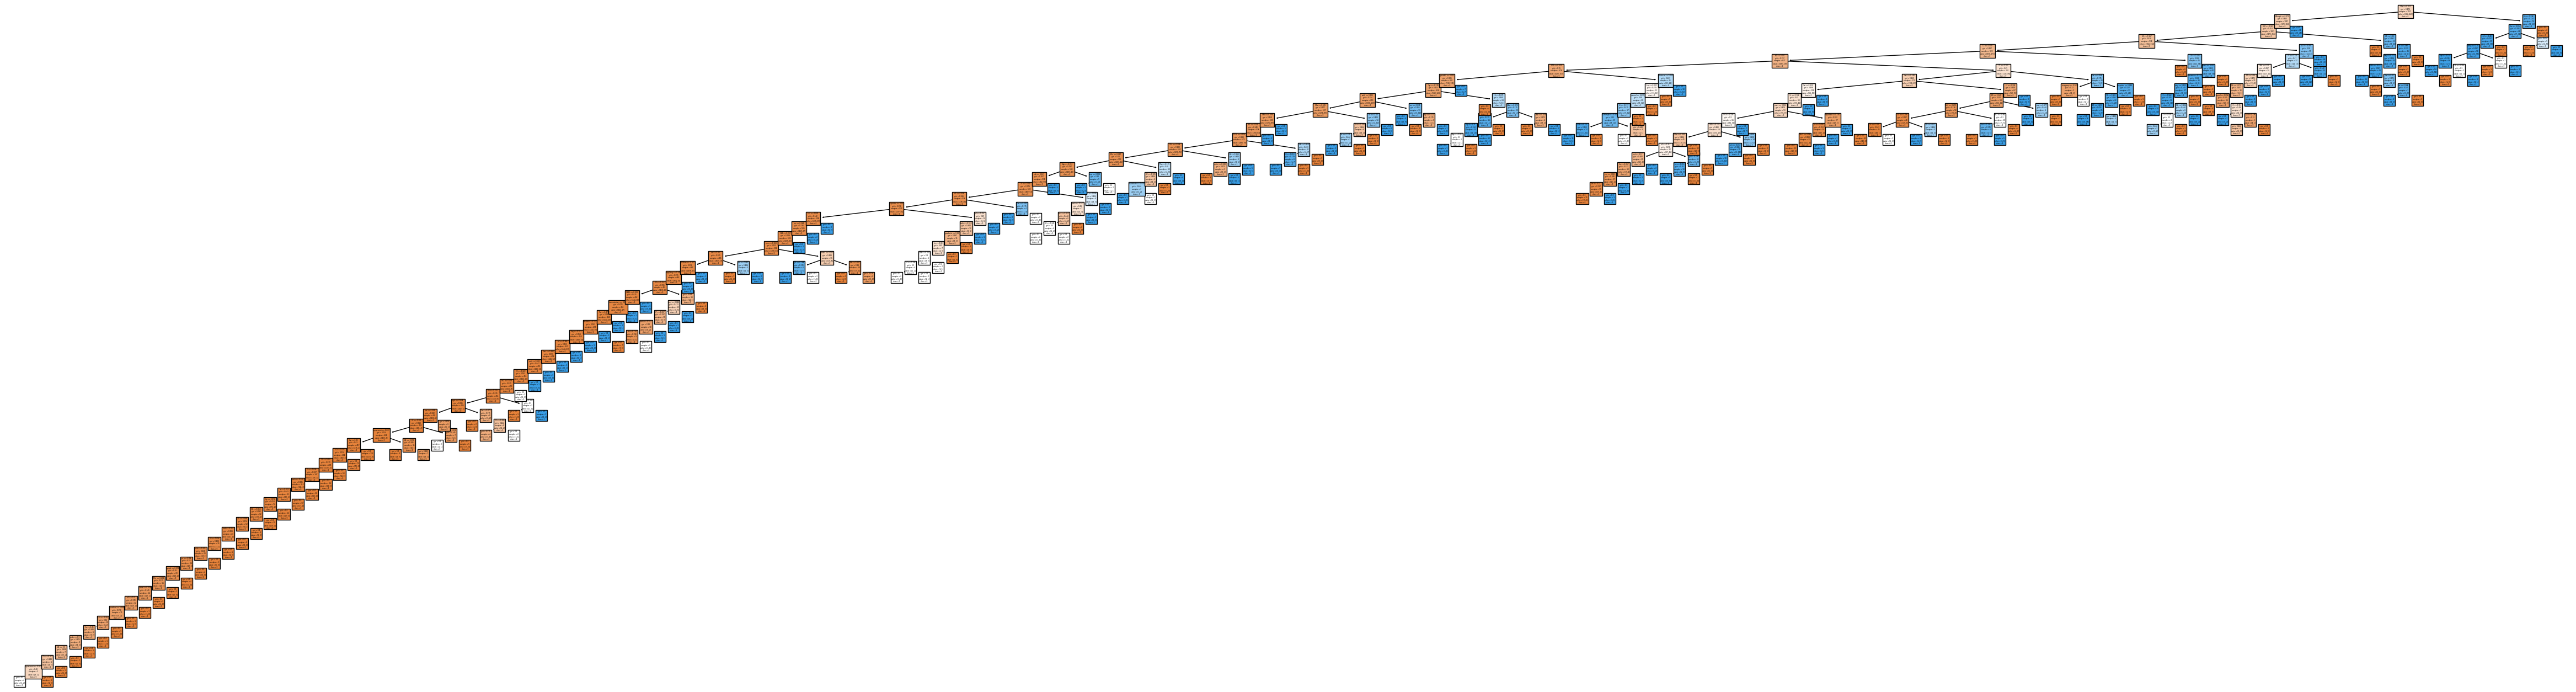

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Fill missing values
training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

# Split data into features and target
Tr_X = training_data['input']
Tr_y = training_data['Classification']

Te_X = testing_data['Equation']
Te_y = testing_data['Classification']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
Tr_X = tfidf_vectorizer.fit_transform(Tr_X)
Te_X = tfidf_vectorizer.transform(Te_X)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out().tolist()

# Create and train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculate accuracy on training and test data
train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Plot the Decision Tree
plt.figure(figsize=(60, 16))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "3"])
plt.show()


Training Set Accuracy (max_depth=7): 0.79326
Test Set Accuracy (max_depth=7): 0.70000


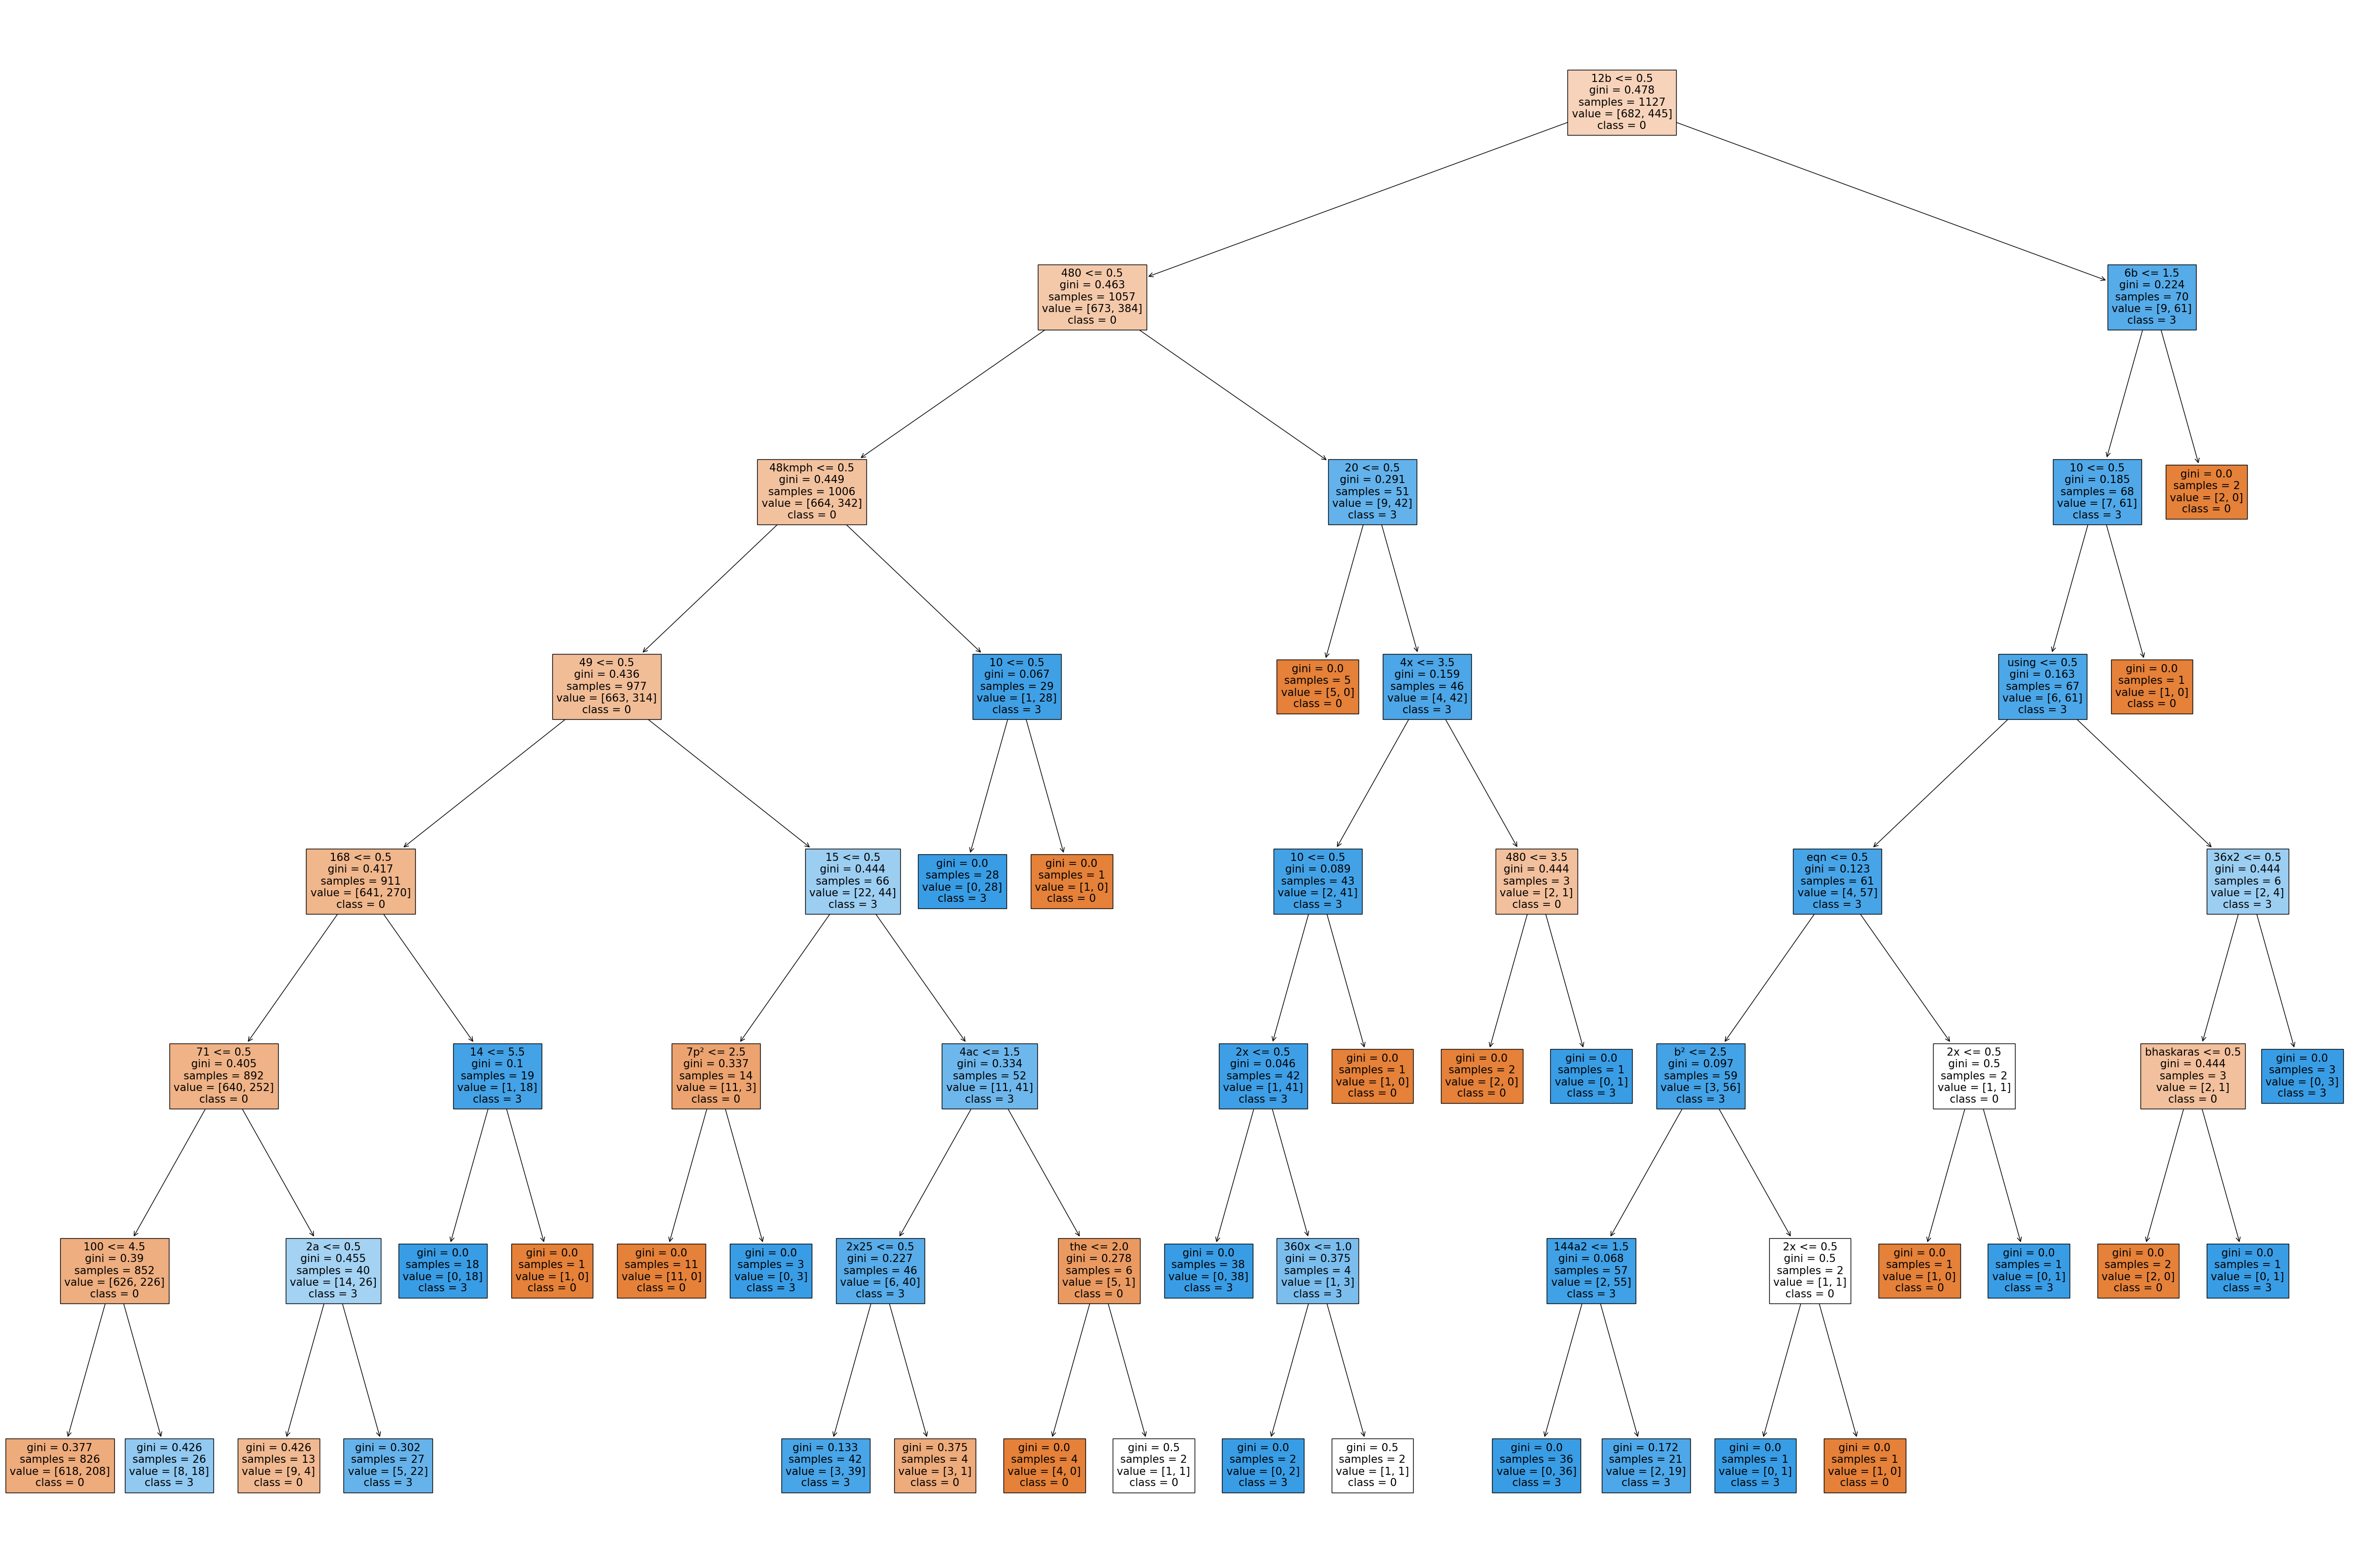

In [41]:
# Set the max_depth constraint
max_depth = 7  # Adjust the value as needed

# Create and train the Decision Tree classifier with max_depth constraint
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(Tr_X, Tr_y)

train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy (max_depth={max_depth}): {train_accuracy:.5f}")
print(f"Test Set Accuracy (max_depth={max_depth}): {test_accuracy:.5f}")

# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(60, 40))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "3"])
plt.show()



Training Set Accuracy with 'entropy' criterion: 0.7781721384205856
Test Set Accuracy with 'entropy' criterion: 0.7


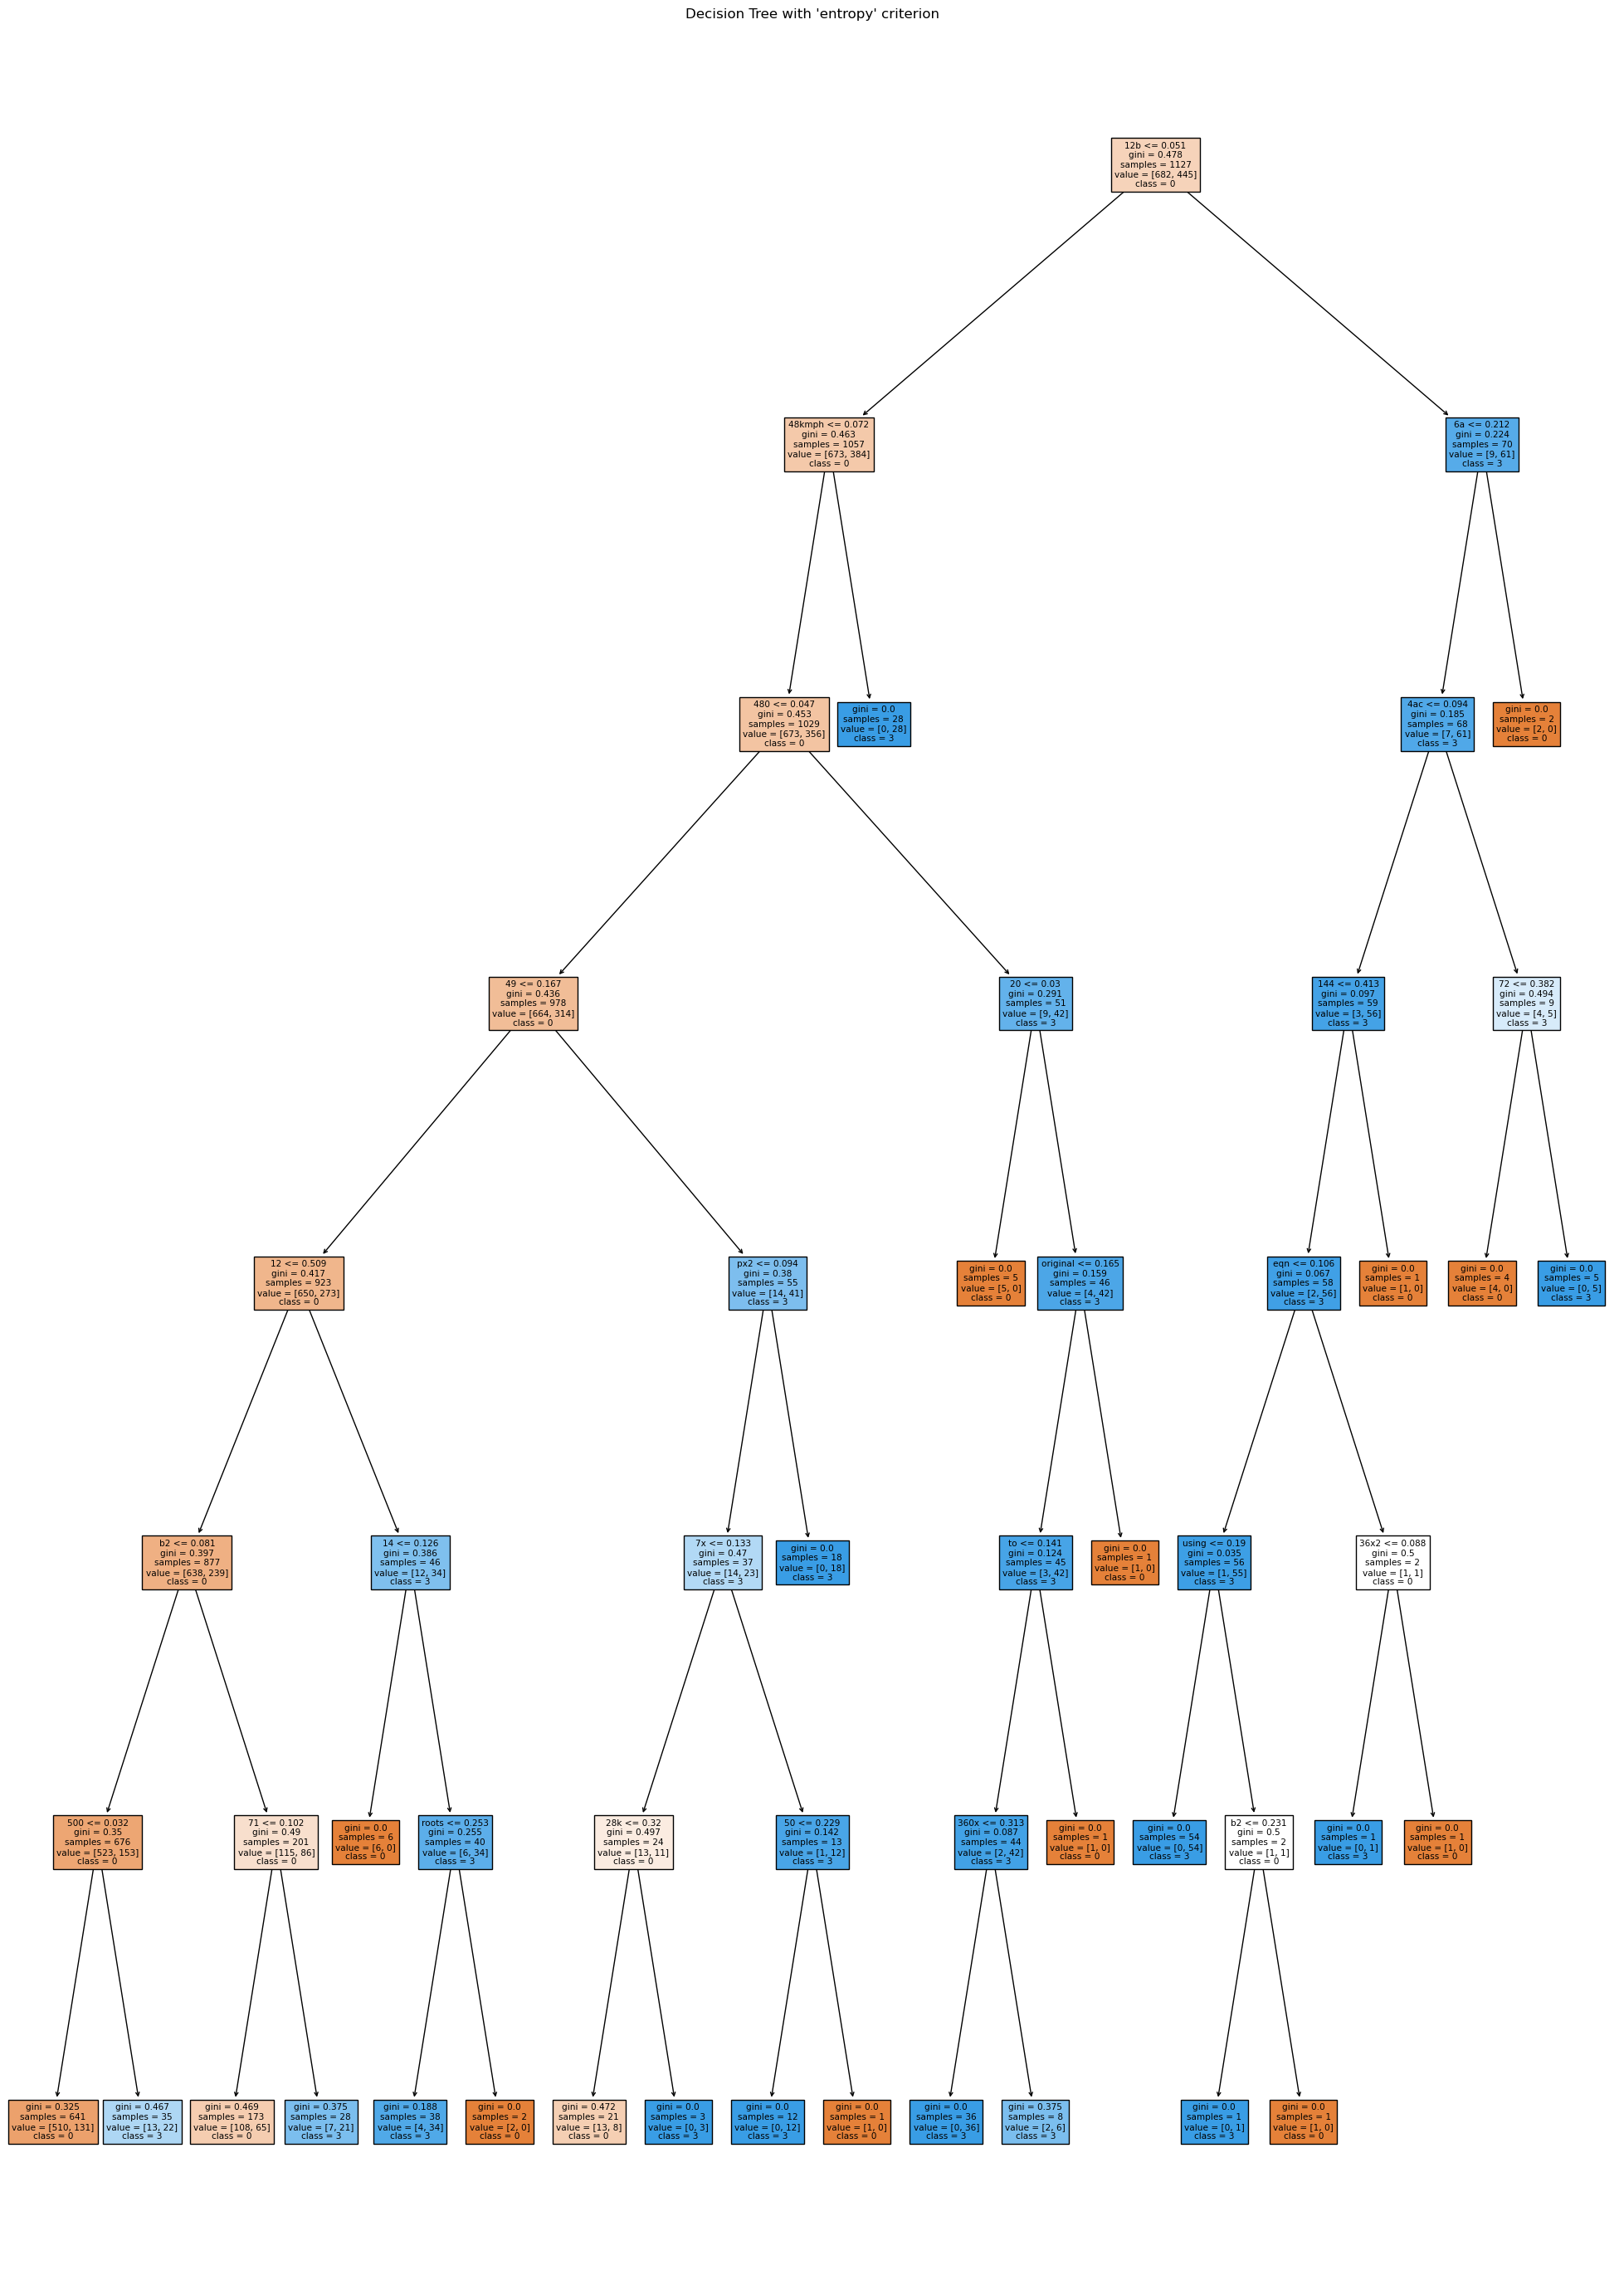

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

your_feature_names = vectorizer.get_feature_names_out()


model_entropy = DecisionTreeClassifier(max_depth=7, criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)

training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)

print("\nTraining Set Accuracy with 'entropy' criterion:", training_accuracy_entropy)
print("Test Set Accuracy with 'entropy' criterion:", test_accuracy_entropy)

plt.figure(figsize=(25, 35))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "3"])
plt.title("Decision Tree with 'entropy' criterion")
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(training_data['input'])
X_test = vectorizer.transform(testing_data['Equation'])

y = training_data['Classification']
y_test = testing_data['Classification']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=30)

decision_tree = DecisionTreeClassifier(max_depth=7)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_val, y_pred_dt)
classification_report_dt = classification_report(y_val, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)

random_forest = RandomForestClassifier(n_estimators=55, max_depth=7, random_state=30)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_val, y_pred_rf)
classification_report_rf = classification_report(y_val, y_pred_rf)

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Decision Tree Accuracy: 0.6843657817109144
Decision Tree Confusion Matrix:
 [[193  12]
 [ 95  39]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.94      0.78       205
           1       0.76      0.29      0.42       134

    accuracy                           0.68       339
   macro avg       0.72      0.62      0.60       339
weighted avg       0.71      0.68      0.64       339


Random Forest Accuracy: 0.6991150442477876
Random Forest Confusion Matrix:
 [[196   9]
 [ 93  41]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.96      0.79       205
           1       0.82      0.31      0.45       134

    accuracy                           0.70       339
   macro avg       0.75      0.63      0.62       339
weighted avg       0.73      0.70      0.66       339

